# 5조 중간고사 분석 제안서

201984053 이상윤

201904050 신종훈

---

# 목적
```
경기도민의 삶의 질에 대한 연구는 매우 중요합니다. 이는 삶의 질을 평가하고 향상시키는 데 있어서 핵심적인 역할을 합니다. '2020 경기도민 삶의 질 조사'자료를 통해 경기도민의 삶의 상태를 종합적으로 파악할 수 있었습니다. 이 자료는 각 지역의 특성을 고려하여 수행되었으며, 가구와 개인의 다양한 특성을 포함하여 조사 데이터가 수집되어있습니다.

이를 통해 우리는 경기도민의 다양한 생각, 의견, 현실적인 실태 등을 파악할 수 있었습니다. 이러한 정보는 삶의 질과 관련된 다양한 요인에 대한 이해를 높이고, 정책 결정에 유용한 자료로 활용될 수 있습니다. 또한, 이 자료의 결과를 통해 경기도민의 삶의 질에 영향을 주는 주요 요인을 파악하고, 이를 개선하기 위한 정책 방향을 모색할 수 있습니다. 이는 지역사회의 발전과 도민들의 삶의 만족도 향상에 기여할 것으로 기대됩니다.
```

# 데이터 수집
- 출처 : 강남대 이러님 - 기계학습과 특징 추출(7주차자료)

- 수집 방법 : 위 데이터는 강남대 이러님 - 기계학습과 특징 추출(7주차자료)에 교수님이 공유해주신 자료이다.

- 수집된 데이터의 구조 및 특성 설명 :
16,000개의 행과 190개의 열로 구성되어있다.
float64: 130개의 열 // int64: 55개의 열 // object: 5개의 열

---

# 데이터 확인 및 전처리

## 데이터 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
df = pd.read_excel('exam_data.xlsx')

In [3]:
# 데이터 확인
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 190 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    PID       16000 non-null  int64  
 1    HID       16000 non-null  int64  
 2    DQ1       16000 non-null  int64  
 3    DQ2       16000 non-null  int64  
 4    DQ3       16000 non-null  int64  
 5    DQ4       16000 non-null  int64  
 6    DQ5       16000 non-null  int64  
 7    DQ6       16000 non-null  int64  
 8    DQ7       16000 non-null  int64  
 9    DQ8       16000 non-null  int64  
 10   DQ9       16000 non-null  int64  
 11   DQ10      16000 non-null  int64  
 12   DQ11      16000 non-null  int64  
 13   DQ12      16000 non-null  int64  
 14   DQ13      16000 non-null  int64  
 15   DQ14      15903 non-null  float64
 16   DQ15      16000 non-null  int64  
 17   DQ16      16000 non-null  int64  
 18   DQ17      16000 non-null  int64  
 19   A1_1      16000 non-null  int64  
 20   A1_2

In [4]:
df.head()

,PID,HID,DQ1,DQ2,DQ3,DQ4,DQ5,DQ6,DQ7,DQ8,...,DQ15_8,DQ16_1,DQ16_2,DQ16_3,DQ16_4,DQ16_5,DQ16_6,DQ16_7,DQ16_8,HSWT
0,12,1,1,5,3,3,3,3,2,2,...,NaN,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,0.547950
1,22,2,1,5,3,2,2,2,2,2,...,NaN,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.484482
2,31,3,1,5,3,2,2,2,1,1,...,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.381194
3,41,4,1,5,3,3,2,2,1,1,...,NaN,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,0.563903
4,51,5,1,5,3,2,2,1,1,1,...,NaN,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.332049


In [5]:
df.describe()

,PID,HID,DQ1,DQ2,DQ3,DQ4,DQ5,DQ6,DQ7,DQ8,...,DQ15_8,DQ16_1,DQ16_2,DQ16_3,DQ16_4,DQ16_5,DQ16_6,DQ16_7,DQ16_8,HSWT
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000,16000.00000,...,2.0,16000.000000,12737.000000,7066.000000,2631.000000,392.000000,74.000000,17.000000,2.0,16000.000000
mean,80052.017063,8005.068250,16.117938,2.969000,2.98800,2.432437,2.226375,2.104812,1.334563,1.33450,...,1.0,3.645812,3.629034,3.971129,4.032307,4.025510,4.040541,4.411765,5.0,1.000000
std,46228.069154,4622.805904,10.013556,1.153905,0.14224,1.057239,0.916069,0.813399,0.471984,0.47183,...,0.0,1.724761,1.732236,1.630222,1.602784,1.670984,1.723641,1.371989,0.0,1.721553
min,12.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.0,0.009128
25%,40028.500000,4002.750000,8.000000,3.000000,3.00000,2.000000,2.000000,2.000000,1.000000,1.00000,...,1.0,2.000000,2.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.0,0.256753
50%,80036.000000,8003.500000,15.000000,3.000000,3.00000,2.000000,2.000000,2.000000,1.000000,1.00000,...,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,0.552603
75%,120114.500000,12011.250000,23.000000,3.000000,3.00000,3.000000,3.000000,3.000000,2.000000,2.00000,...,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,1.095558
max,160111.000000,16011.000000,38.000000,7.000000,4.00000,8.000000,8.000000,6.000000,3.000000,2.00000,...,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,49.839419


---

## 중복된 데이터 확인 및 처리

### DQ칼럼 데이터 처리

DQ7_1부터 기존 칼럼과 중복이 된다 (ex: DQ9와 DQ9_1, DQ9_2,,,)

그렇지만 DQ9_x 와 기존 값이 어떠한 상관관계가 있는지 제공한 코드북만 보고선 알 수 없기 때문에 DQ7_1부터 DQ16_8까지 제거한다.

In [6]:
df[['DQ7', 'DQ7_1', 'DQ7_2']]

,DQ7,DQ7_1,DQ7_2
0,2,1,2.0
1,2,1,2.0
2,1,1,2.0
3,1,1,2.0
4,1,1,2.0
...,...,...,...
15995,2,1,2.0
15996,1,1,2.0
15997,1,1,2.0
15998,1,1,2.0


In [7]:
df.loc[:, 'DQ7_1':]

,DQ7_1,DQ7_2,DQ7_3,DQ7_4,DQ7_5,DQ7_6,DQ7_7,DQ7_8,DQ8_1,DQ8_2,...,DQ15_8,DQ16_1,DQ16_2,DQ16_3,DQ16_4,DQ16_5,DQ16_6,DQ16_7,DQ16_8,HSWT
0,1,2.0,3.0,NaN,NaN,NaN,NaN,NaN,1,2.0,...,NaN,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,0.547950
1,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,...,NaN,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.484482
2,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,7.0,...,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.381194
3,1,2.0,3.0,NaN,NaN,NaN,NaN,NaN,1,2.0,...,NaN,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,0.563903
4,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,...,NaN,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.332049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1,2.0,3.0,NaN,NaN,NaN,NaN,NaN,1,2.0,...,NaN,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,0.934112
15996,1,2.0,3.0,4.0,NaN,NaN,NaN,NaN,1,2.0,...,NaN,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.402984
15997,1,2.0,3.0,NaN,NaN,NaN,NaN,NaN,1,10.0,...,NaN,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,0.186433
15998,1,2.0,3.0,4.0,5.0,NaN,NaN,NaN,1,2.0,...,NaN,5,5.0,5.0,5.0,5.0,NaN,NaN,NaN,0.498377


In [8]:
df = df.drop(df.columns[df.columns.get_loc('DQ7_1'):df.columns.get_loc('DQ16_8')+1], axis=1)
df

,PID,HID,DQ1,DQ2,DQ3,DQ4,DQ5,DQ6,DQ7,DQ8,...,B6_1_1순위,B6_1_2순위,B6A_etc,C1,C1_etc,C2_1,C2_2,C3,C3_etc,HSWT
0,12,1,1,5,3,3,3,3,2,2,...,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547950
1,22,2,1,5,3,2,2,2,2,2,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484482
2,31,3,1,5,3,2,2,2,1,1,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.381194
3,41,4,1,5,3,3,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563903
4,51,5,1,5,3,2,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,160072,16007,13,3,3,3,2,1,2,2,...,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934112
15996,160081,16008,18,3,3,4,4,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402984
15997,160091,16009,21,5,3,3,3,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186433
15998,160101,16010,27,3,3,5,2,2,1,1,...,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498377


In [9]:
# 칼럼 160 -> 110개로 줄어든 모습
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 110 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    PID       16000 non-null  int64  
 1    HID       16000 non-null  int64  
 2    DQ1       16000 non-null  int64  
 3    DQ2       16000 non-null  int64  
 4    DQ3       16000 non-null  int64  
 5    DQ4       16000 non-null  int64  
 6    DQ5       16000 non-null  int64  
 7    DQ6       16000 non-null  int64  
 8    DQ7       16000 non-null  int64  
 9    DQ8       16000 non-null  int64  
 10   DQ9       16000 non-null  int64  
 11   DQ10      16000 non-null  int64  
 12   DQ11      16000 non-null  int64  
 13   DQ12      16000 non-null  int64  
 14   DQ13      16000 non-null  int64  
 15   DQ14      15903 non-null  float64
 16   DQ15      16000 non-null  int64  
 17   DQ16      16000 non-null  int64  
 18   DQ17      16000 non-null  int64  
 19   A1_1      16000 non-null  int64  
 20   A1_2

### A1칼럼 데이터 처리

A1A_x 값은 1, 2, na 값으로 이루어져있음

즉, A1A_1값이 1이라면 현 주택으로 이사한 이유가 내 집마련이 1순위인것

A1A_x 값을 두 칼럼으로 정리한게 A1_1_1순위, A1_2_2순위 칼럼이다.

In [10]:
df['A1A_1'].value_counts(), df['A1A_2'].value_counts(), df['A1A_3'].value_counts(), df['A1A_9'].value_counts()

(A1A_1
 1.0    2471
 2.0     477
 Name: count, dtype: int64,
 A1A_2
 1.0    900
 2.0    896
 Name: count, dtype: int64,
 A1A_3
 2.0    452
 1.0    163
 Name: count, dtype: int64,
 A1A_9
 1.0    67
 2.0    37
 Name: count, dtype: int64)

In [11]:
df['A1_1_1순위'].value_counts(), df['A1_2_2순위'].value_counts()

(A1_1_1순위
 1.0    2471
 2.0     900
 4.0     771
 8.0     721
 5.0     491
 7.0     454
 6.0     164
 3.0     163
 9.0      67
 Name: count, dtype: int64,
 A1_2_2순위
 7.0    1705
 4.0    1044
 2.0     896
 8.0     795
 6.0     546
 1.0     477
 3.0     452
 5.0     220
 9.0      37
 Name: count, dtype: int64)

데이터를 사용한다면 A1A_1~9 칼럼을 사용하던가 A1_1_1순위, A1_2_2순위 칼럼 2개만 사용하면 될 듯 하다.

In [12]:
df['B4A_1'].value_counts(), df['B4A_2'].value_counts(), df['B4A_3'].value_counts(), df['B4A_9'].value_counts()

(B4A_1
 1.0    1320
 2.0     407
 Name: count, dtype: int64,
 B4A_2
 2.0    827
 1.0    627
 Name: count, dtype: int64,
 B4A_3
 2.0    102
 1.0     55
 Name: count, dtype: int64,
 B4A_9
 1.0    2
 2.0    2
 Name: count, dtype: int64)

In [13]:
df['B4_1_1순위'].value_counts(), df['B4_1_2순위'].value_counts()

(B4_1_1순위
 1.0    1320
 5.0     659
 2.0     627
 6.0     167
 3.0      55
 7.0      32
 4.0      29
 8.0       9
 9.0       2
 Name: count, dtype: int64,
 B4_1_2순위
 2.0    827
 5.0    734
 6.0    591
 1.0    407
 3.0    102
 7.0     88
 4.0     65
 8.0     62
 9.0      2
 Name: count, dtype: int64)

B4 칼럼도 A1 칼럼과 마찬가지로 형식이 되어있다.

나머지 관련 B5, B6칼럼도 마찬가지다.

따라서 xx_1순위, xx_2순위 칼럼만 남기고 나머지 제외

In [14]:
df = df.drop(df.columns[df.columns.get_loc('A1A_1'):df.columns.get_loc('A1A_9')+1], axis=1)
df = df.drop(df.columns[df.columns.get_loc('B4A_1'):df.columns.get_loc('B4A_9')+1], axis=1)
df = df.drop(df.columns[df.columns.get_loc('B5_1'):df.columns.get_loc('B5_9')+1], axis=1)
df = df.drop(df.columns[df.columns.get_loc('B6A_1'):df.columns.get_loc('B6A_9')+1], axis=1)
df

,PID,HID,DQ1,DQ2,DQ3,DQ4,DQ5,DQ6,DQ7,DQ8,...,B6_1_1순위,B6_1_2순위,B6A_etc,C1,C1_etc,C2_1,C2_2,C3,C3_etc,HSWT
0,12,1,1,5,3,3,3,3,2,2,...,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547950
1,22,2,1,5,3,2,2,2,2,2,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.484482
2,31,3,1,5,3,2,2,2,1,1,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.381194
3,41,4,1,5,3,3,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563903
4,51,5,1,5,3,2,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,160072,16007,13,3,3,3,2,1,2,2,...,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934112
15996,160081,16008,18,3,3,4,4,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402984
15997,160091,16009,21,5,3,3,3,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186433
15998,160101,16010,27,3,3,5,2,2,1,1,...,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498377


---

# 데이터 탐색 및 시각화

## 1인가구

1인가구에 대한 데이터는 C 칼럼에 존재한다.

1인 가구 해당 칼럼 따로 dataframe 생성

In [15]:
single_df = df[df["C1"].notna()]
single_df

,PID,HID,DQ1,DQ2,DQ3,DQ4,DQ5,DQ6,DQ7,DQ8,...,B6_1_1순위,B6_1_2순위,B6A_etc,C1,C1_etc,C2_1,C2_2,C3,C3_etc,HSWT
5,61,6,1,5,3,1,1,1,1,1,...,NaN,NaN,NaN,1.0,NaN,5.0,0.0,3.0,NaN,0.457518
8,91,9,1,5,3,1,1,1,1,1,...,8.0,3.0,NaN,3.0,NaN,1.0,0.0,8.0,NaN,0.634485
11,121,12,1,2,3,1,1,1,1,1,...,2.0,6.0,NaN,1.0,NaN,4.0,0.0,3.0,NaN,49.839419
12,131,13,1,1,3,1,1,1,1,1,...,2.0,8.0,NaN,1.0,NaN,6.0,0.0,3.0,NaN,12.237705
22,231,23,1,5,3,1,1,1,1,1,...,2.0,8.0,NaN,1.0,NaN,1.0,0.0,1.0,NaN,1.347610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15965,159771,15977,38,3,3,1,1,1,1,1,...,NaN,NaN,NaN,1.0,NaN,10.0,6.0,8.0,NaN,0.672465
15978,159901,15990,38,3,3,1,1,1,1,1,...,NaN,NaN,NaN,1.0,NaN,4.0,5.0,3.0,NaN,0.355382
15982,159941,15994,38,5,3,1,1,1,1,1,...,NaN,NaN,NaN,1.0,NaN,7.0,0.0,2.0,NaN,0.209533
15986,159981,15998,38,4,3,1,1,1,1,1,...,2.0,8.0,NaN,4.0,NaN,2.0,0.0,8.0,NaN,0.171457


### 1. 혼자 사는 이유(C1)

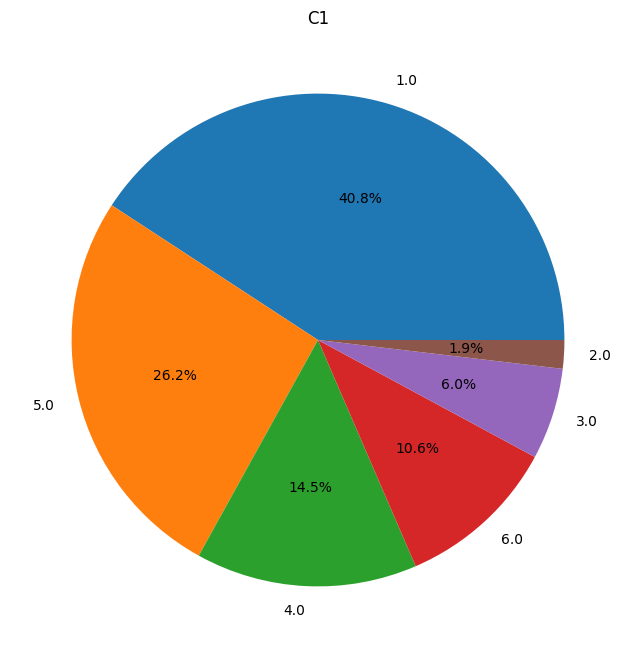

In [16]:
c1_counts = single_df['C1'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(c1_counts, labels=c1_counts.index, autopct='%1.1f%%')
plt.title("C1")
plt.show()

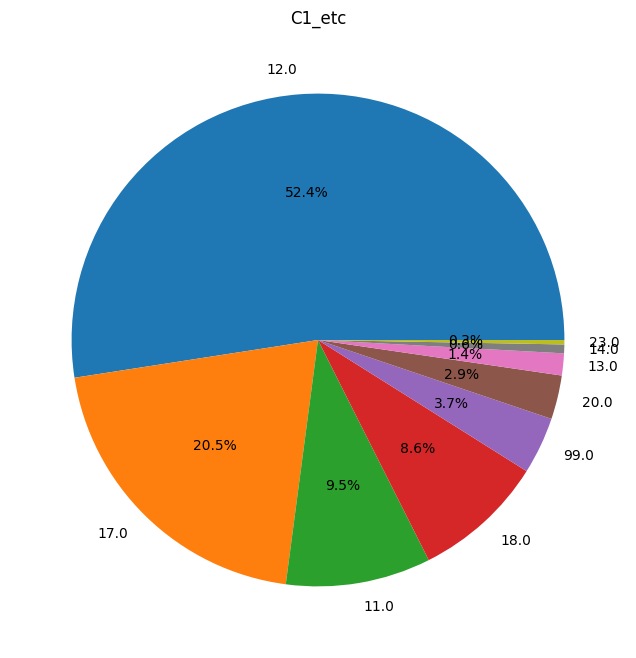

In [17]:
c1_counts = single_df['C1_etc'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(c1_counts, labels=c1_counts.index, autopct='%1.1f%%')
plt.title("C1_etc")
plt.show()


### 2. 총 개월수 분포(C2)

In [18]:
single_df['C2_1'].value_counts()

C2_1
5.0     503
3.0     422
2.0     379
10.0    373
4.0     256
1.0     207
6.0     202
7.0     171
8.0     157
15.0    123
20.0    113
12.0     67
0.0      46
9.0      45
13.0     34
11.0     32
30.0     23
25.0     19
16.0     13
40.0     12
14.0     10
18.0      9
22.0      6
24.0      6
23.0      5
26.0      4
17.0      4
35.0      4
28.0      3
33.0      3
19.0      2
32.0      2
27.0      2
41.0      1
50.0      1
21.0      1
42.0      1
34.0      1
38.0      1
Name: count, dtype: int64

- 혼자 산 개월 수를 (년도 * 12 + 개월) 수로 새로운 칼럼 생성

In [40]:
single_df['C2_total'] = single_df['C2_1'] * 12 + single_df['C2_2']
single_df['C2_total']

5         60.0
8         12.0
23        24.0
24        36.0
51       180.0
         ...  
15890    120.0
15900    120.0
15908     78.0
15965    126.0
15986     24.0
Name: C2_total, Length: 1698, dtype: float64

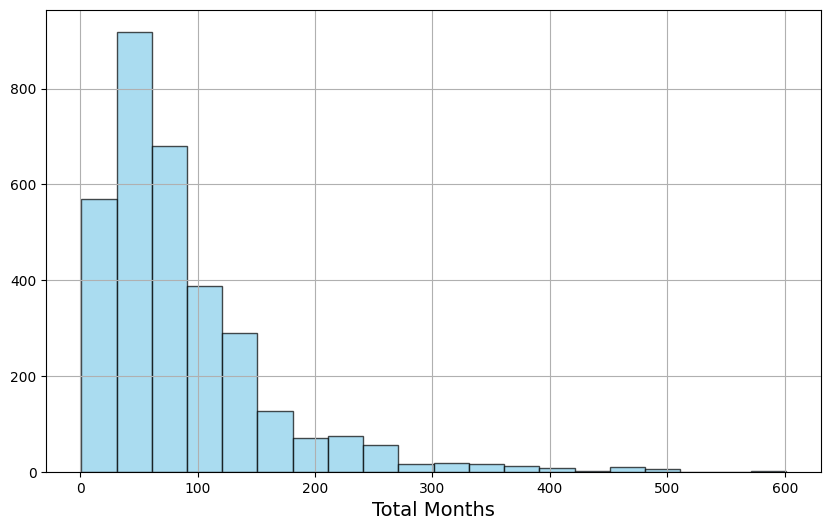

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(single_df['C2_total'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Total Months', fontsize=14)
plt.grid(True)
plt.show()


<Axes: ylabel='C2_total'>

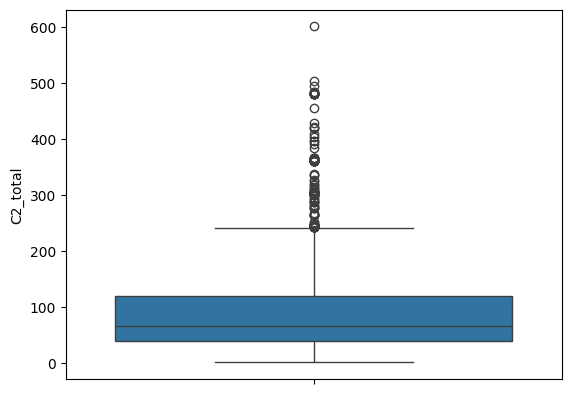

In [21]:
sns.boxplot(data=single_df, y='C2_total')

생각보다 많은 높은 값(이상치)이 존재한다.

나이와 비교하여 나이 < 총 개월 수 인 칼럼 확인 후 제거하기

In [22]:
Q1 = single_df['C2_total'].quantile(0.25)
Q3 = single_df['C2_total'].quantile(0.75)
IQR = Q3 - Q1
outliers = single_df[single_df['C2_total'] > Q3 + 1.5 * IQR][['DQ10', 'C2_total']]
print(outliers)
start_year = (2020 - outliers['C2_total'] / 12).sort_values(ascending=False)
print(start_year)

       DQ10  C2_total
77     1969     247.0
209    1971     305.0
214    1951     404.0
217    1968     302.0
221    1974     242.0
...     ...       ...
15826  1951     420.0
15842  1952     243.0
15849  1959     366.0
15889  1949     456.0
15892  1938     396.0

[138 rows x 2 columns]
13453    1999.833333
5461     1999.833333
6642     1999.833333
221      1999.833333
6648     1999.833333
            ...     
15764    1979.750000
14824    1979.750000
4216     1978.833333
10152    1978.000000
5802     1969.916667
Name: C2_total, Length: 138, dtype: float64


13453 index의 1999값은 해당 년도부터 집에 살았다는 뜻이다.

In [23]:
outliers = outliers.merge(start_year, left_index=True, right_index=True)
outliers

,DQ10,C2_total_x,C2_total_y
77,1969,247.0,1999.416667
209,1971,305.0,1994.583333
214,1951,404.0,1986.333333
217,1968,302.0,1994.833333
221,1974,242.0,1999.833333
...,...,...,...
15826,1951,420.0,1985.000000
15842,1952,243.0,1999.750000
15849,1959,366.0,1989.500000
15889,1949,456.0,1982.000000


In [24]:
outliers[outliers['DQ10'] > outliers['C2_total_y']]

,DQ10,C2_total_x,C2_total_y


해당 집에서 살기 시작한 년도가 현재 나이보다 많은 경우가 없기 때문에

모든 이상치는 제거하지 않는다.

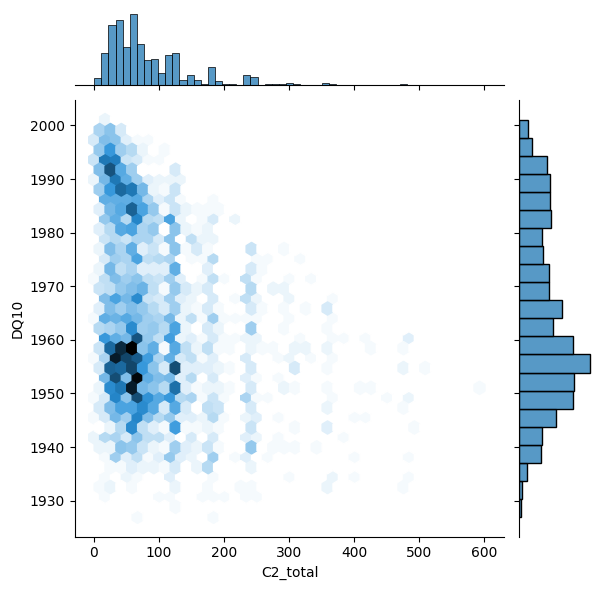

In [25]:
sns.jointplot(x='C2_total', y='DQ10', data=single_df, kind='hex')

#### 총 개월수 분포 분석 결론
```
대부분의 인구가 현재 집에 산 지 얼마 안 되었다.
1950~1960년대와 1980~2000년 사이의 인구가 비율이 높다.
경기도로 최근에 이사 온 사람이 많고 젊은 층과 중장년층의 비율이 높기 때문에 해당하는 시민의 관련한 정책을 내면 좋을 것 같다.
```

### 3. 혼자 사는데에 불편함

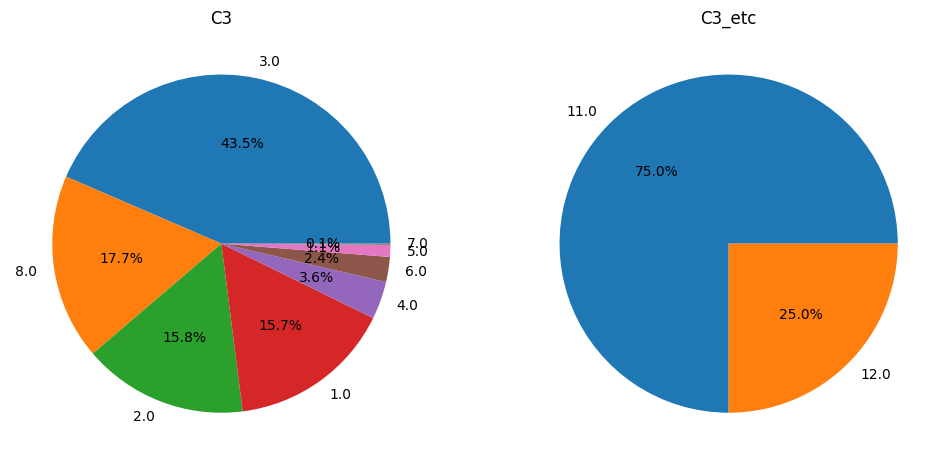

In [26]:
c3_counts = single_df['C3'].value_counts()
c3_etc_counts = single_df['C3_etc'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(c3_counts, labels=c3_counts.index, autopct='%1.1f%%')
axes[0].set_title('C3')

axes[1].pie(c3_etc_counts, labels=c3_etc_counts.index, autopct='%1.1f%%')
axes[1].set_title('C3_etc')

plt.show()


#### 혼자 생활하는데 불편함 그래프의 결론
```

1인 가구가 직면하는 어려움을 드러내는 이 데이터는 혼자 사는 사람들이 여러 상황에서 도움을 받기 어려울 수 있음을 보여줍니다. 특히, 아플 때나 응급 상황에 대처하기 어려울 경우, 혼자 사는 사람들은 적절한 도움을 받기 어려운 상황에 놓일 수 있습니다. 또한, 식사나 집안일 처리와 같은 데서도 혼자서 해결하기 어려움을 겪을 수 있으며, 이는 혼자 사는 이들이 여러 가지 일상적인 도전에 직면하고 있음을 시사합니다.

그러나 이러한 어려움에도 불구하고, 1인 가구는 여전히 자신만의 삶을 즐기고 있습니다. 그들은 자신의 생활에 만족하며, 혼자 사는 것을 선택한 이유가 있습니다. 이러한 점을 감안할 때, 이러한 어려움을 해결하는 방법을 모색할 때는 1인 가구들의 의견과 요구사항을 듣고 반영하는 것이 중요합니다. 그리고 그들이 자유롭고 편안하게 자신만의 삶을 즐길 수 있도록 돕는 정책과 서비스를 제공하는 것이 필요합니다
```

```
혼자 사는 사람들을 위한 정책과 서비스로는 응급 서비스, 가사 및 집안일 지원, 사회적 연결 그룹, 주거 지원, 건강 관리 및 병원 서비스 등이 있습니다. 이러한 지원은 혼자 사는 사람들이 안전하고 편안하게 삶을 즐길 수 있도록 돕는 역할을 합니다. 그러나 이러한 정책과 서비스는 현장 상황에 맞게 유연하게 조정되어야 하며, 다양한 Bed를 충족시킬 수 있도록 다양성과 포용성을 갖추어야 합니다.
```

---

## 주택 형태

전체 데이터와 1인가구의 다른점 조사

+ 주택 형태(DQ2)
+ 주거 위치(DQ3)
+ 성별(DQ9)
+ 혼인상태(DQ12)
+ 점유형태(A3)
+ 부족한 생활비 마련 방법 1순위(B4_1_1순위)
+ 가계 관련 고민 1순위(B5_1순위)
+ 가계 부채 여부(B6)

### 1. 주택 형태(DQ2)

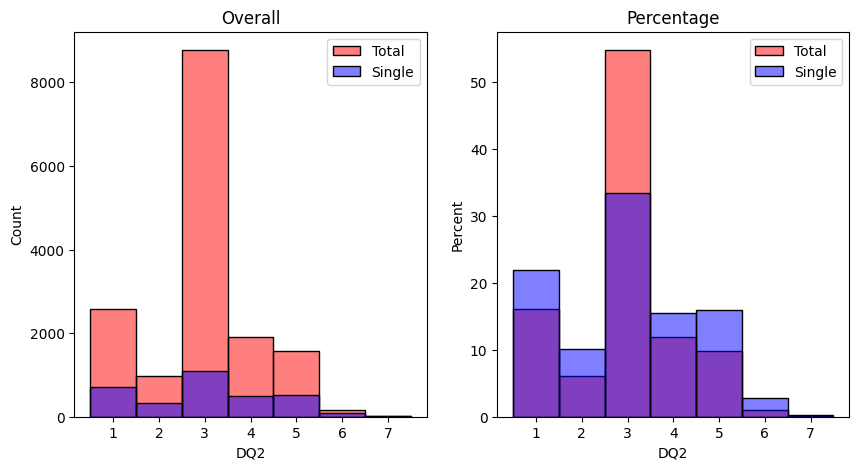

In [27]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['DQ2'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ2'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])

fig.add_subplot(1, 2, 2)
sns.histplot(df['DQ2'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ2'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])

```
이 정보는 도시 계획 및 주택 정책 수립에 유용한 다양한 측면이 있습니다. 먼저, 아파트에 거주하는 비율이 높다는 것은 해당 지역의 주거 수요가 높을 가능성이 있으며, 이에 따른 적절한 주택 공급 계획이 필요할 것입니다. 또한, 1인 가구의 비율이 높다는 것은 독거 노인, 청년층 등의 단독 주택 수요가 증가할 수 있다는 것을 시사합니다. 이러한 정보를 토대로 주거 시설의 종류와 구성을 결정하고, 효과적인 주택 정책을 마련할 수 있습니다. 또한, 도시 계획 측면에서는 이러한 주거 패턴을 고려하여 인프라 및 생활 편의 시설의 배치, 교통망의 구축 등을 계획할 수 있습니다. 이를 통해 지역의 발전과 주민의 삶의 질 향상에 기여할 수 있습니다.
```

### 2. 주거위치(DQ3)

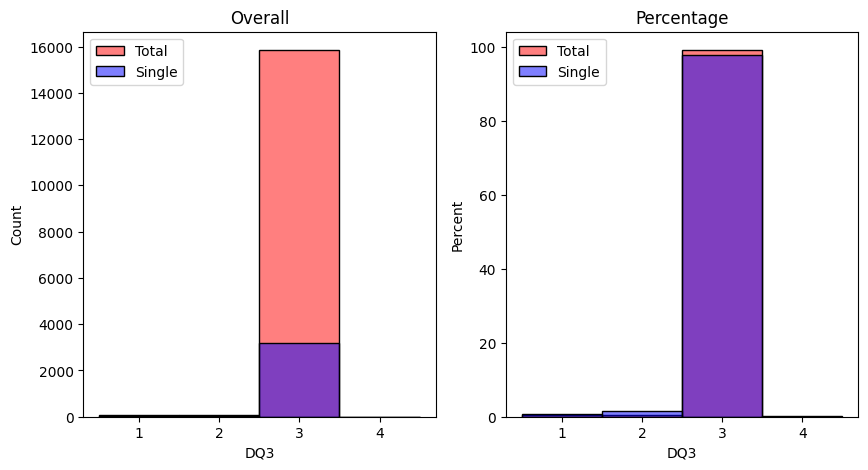

In [28]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['DQ3'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ3'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])

fig.add_subplot(1, 2, 2)
sns.histplot(df['DQ3'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ3'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])

지상의 비율이 너무 높기 때문에 y축을 잘라서 다시 표현한다.

(0.0, 100.0)

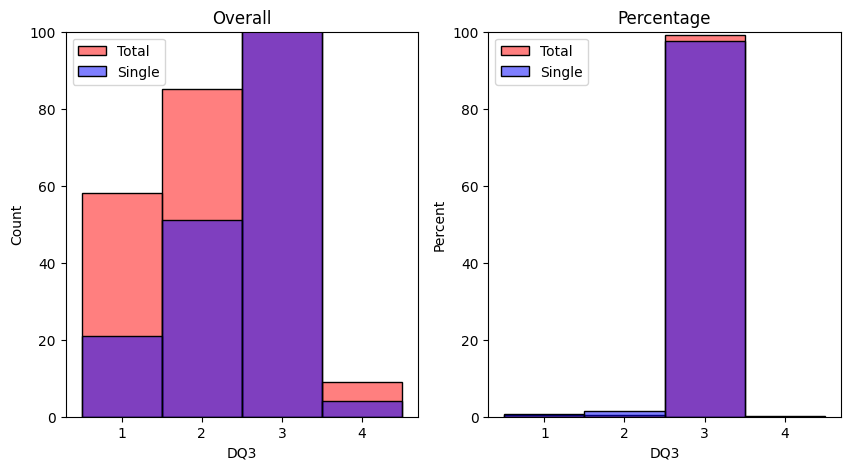

In [29]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['DQ3'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ3'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])
plt.ylim(0, 100)

fig.add_subplot(1, 2, 2)
sns.histplot(df['DQ3'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ3'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])
plt.ylim(0, 100)

대략 1,2% 가 지상에 살고 있지 않다.

### 3. 성별(DQ9)

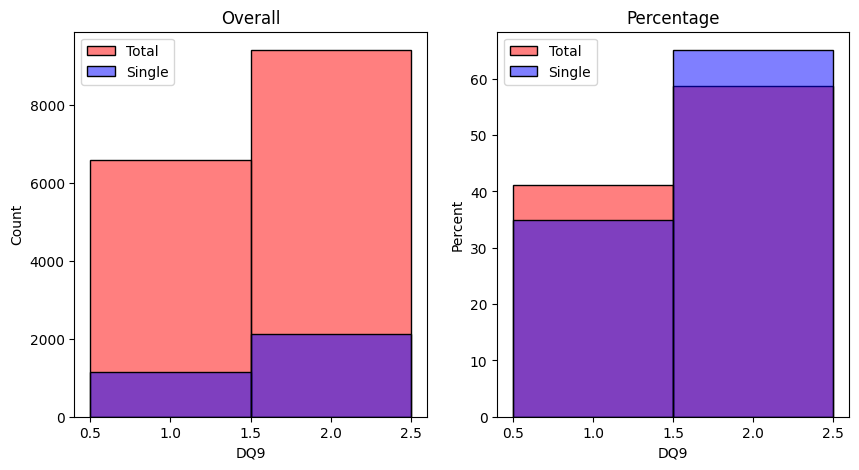

In [30]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['DQ9'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ9'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])

fig.add_subplot(1, 2, 2)
sns.histplot(df['DQ9'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ9'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])

전체나 1인가구나 여성이 좀 더 많은 모습이다.

### 4. 혼인상태(DQ12)

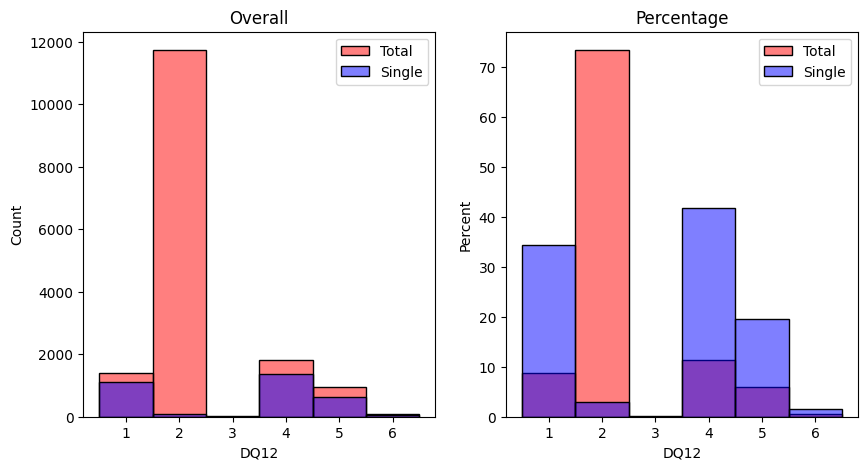

In [31]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['DQ12'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ12'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])

fig.add_subplot(1, 2, 2)
sns.histplot(df['DQ12'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['DQ12'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])

전체 가구와 1인가구가 차이가 생겼다.

아무래도 1인 가구이다 보니 사별, 미혼, 이혼의 비율이 높은 편이며

전체 가구는 배우자 있음이 상당한 비율을 가지고 있다.

## 5. 점유형태(A3)

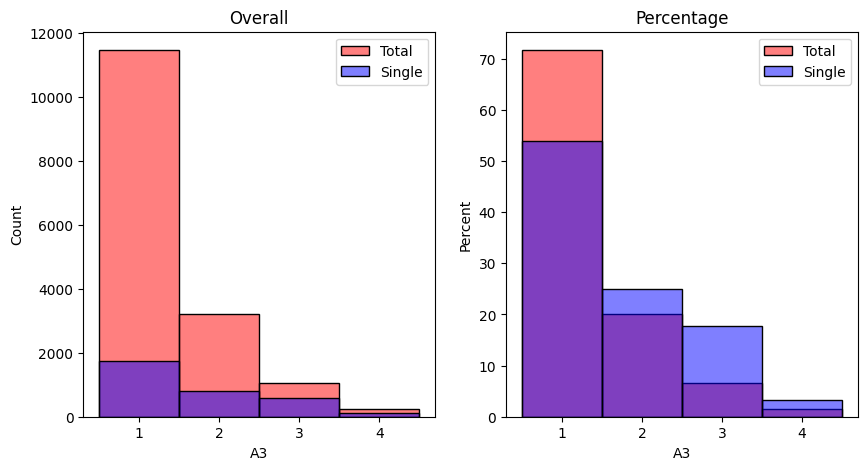

In [32]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['A3'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['A3'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])

fig.add_subplot(1, 2, 2)
sns.histplot(df['A3'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['A3'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])

1인가구로 생각되는 경우에는 보통 전세나 월세 형태의 주거비가 많을 것으로 예상되지만, 실제로는 전체 가구와 1인 가구 모두 자가 거주의 비율이 높은 편입니다. 이는 독거 노인이나 혼자 사는 젊은 성인들이 자가 주택을 선호하거나 보유하고 있는 경우가 많아서 그럴 수 있습니다.

### 6. 부족한 생활비 마련 방법 1순위(B4_1_1순위)

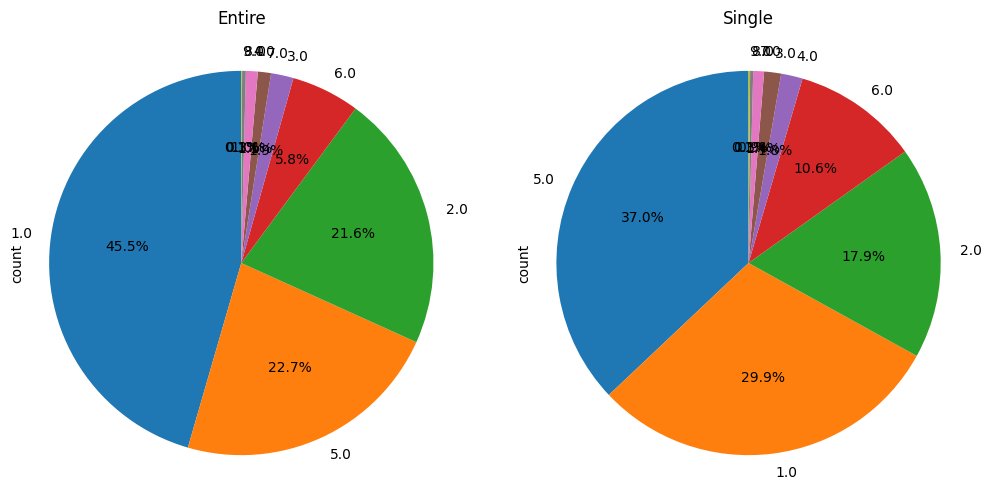

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Entire')
df['B4_1_1순위'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.title('Single')
single_df['B4_1_1순위'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.show()


- 전체 가구의 경우, 생활비를 마련하는 데에는 주로 금융 상품을 활용하는 경향이 있습니다. 그 외에도 금융 상품의 인출이나 해지, 그리고 가족이나 친척의 도움을 받는 비율이 높게 나타납니다.

- 한편, 1인 가구의 경우 가장 높은 비율을 차지하는 것은 가족이나 친척의 도움입니다. 이어서 금융 상품의 이용이 두 번째로 많이 나타나고 있습니다.

### 7. 가계 관련 고민 1순위(B5_1순위)

/Users/jh/miniconda3/envs/school/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/Users/jh/miniconda3/envs/school/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/Users/jh/miniconda3/envs/school/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jh/miniconda3/envs/school/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


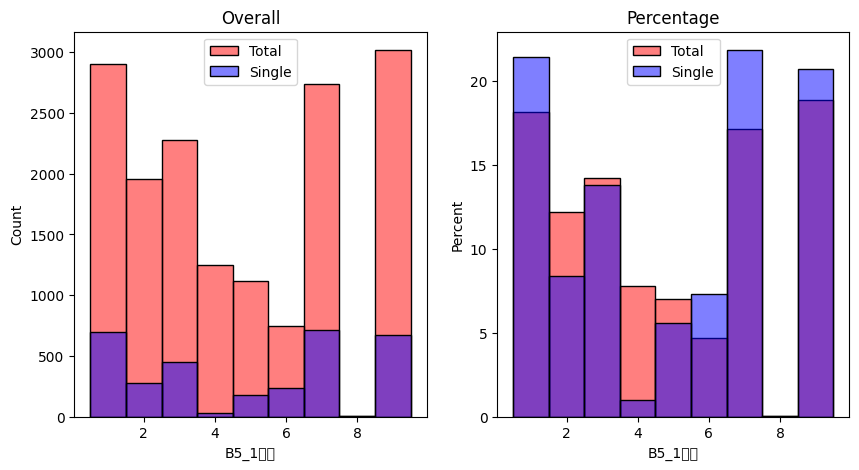

In [34]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['B5_1순위'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['B5_1순위'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])

fig.add_subplot(1, 2, 2)
sns.histplot(df['B5_1순위'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['B5_1순위'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])

전체 가구에선 가계 관련 고민 1순위는 수입 불안정, 노후 생활비 마련, 특별한 고민이 없다가 가장 높은 3가지이며 해당 비율을 1인가구도 비슷하게 나타난다.

### 8. 가계 부채 여부(B6)

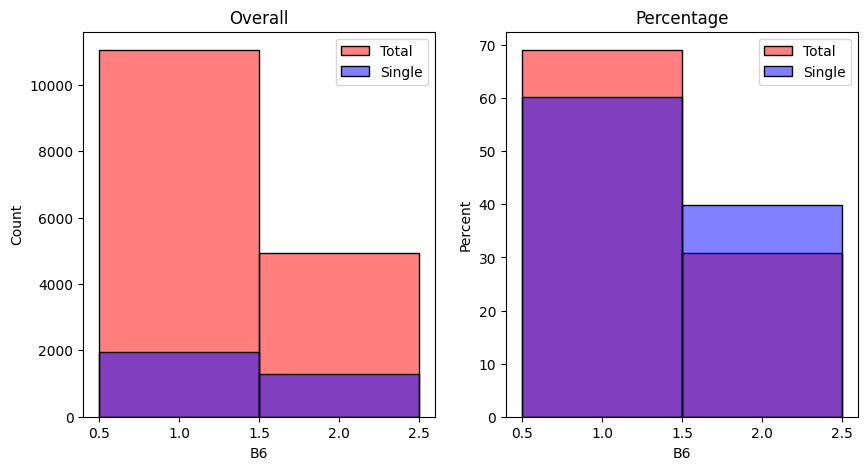

In [35]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
sns.histplot(df['B6'], color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['B6'], color='blue', alpha=0.5, discrete=True)
plt.title('Overall')
plt.legend(['Total', 'Single'])

fig.add_subplot(1, 2, 2)
sns.histplot(df['B6'], stat='percent', color='red', alpha=0.5, discrete=True)
sns.histplot(single_df['B6'], stat='percent', color='blue', alpha=0.5, discrete=True)
plt.title('Percentage')
plt.legend(['Total', 'Single'])

부채 비율은 전체 가구나 1인가구나 비슷한 양상을 띄고 있다.

---

## 1인 가구와 다른 칼럼들과의 관계 파악

### 1인 가구 관련 칼럼 끼리의 관계

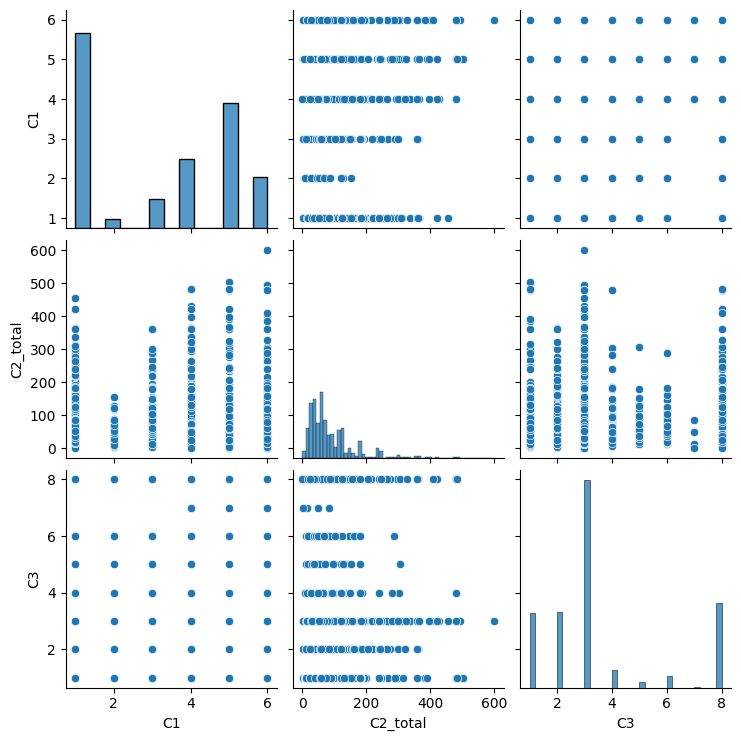

In [36]:
sns.pairplot(single_df[['C1', 'C2_total', 'C3']])

## 다른 칼럼과의 관계

1인 가구 관련 칼럼은

혼자 사는 이유 / 혼자 산 기간 / 혼자 생활하면서 불편한점

총 3가지이다.

그중 상관관계를 분석할 칼럼들을 나열한다.
+ 혼자 사는 이유 + 가계 부채 여부
+ 혼자 산 개월 수 + 생활비 부족 경험 여부

### 1. 혼자 사는 이유 + 가계 부채 여부

<Axes: xlabel='C1', ylabel='count'>

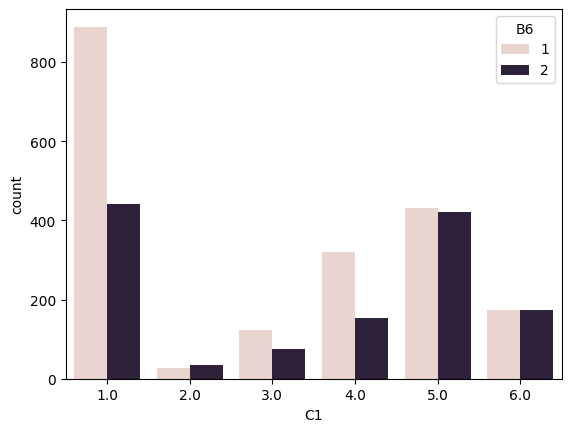

In [37]:
sns.countplot(data=single_df, x='C1', hue='B6')

```
1인 가구 중에서 직장 때문에 혼자 사는 경우에는 가계 부채를 갖는 비율이 높습니다. 이것은 혼자 사는 사람들이 주로 생활비를 마련하기 위해 대출을 이용하기 때문입니다. 전체적으로 봤을 때, 1인 가구는 가계 부채를 갖는 비율이 높은 편입니다. 그러나 학업 때문에 혼자 사는 경우에는 가계 부채가 없는 비율이 조금 더 높아지는 경향이 있습니다. 이는 학업에 집중하여 추가적인 경제적 부담을 피하기 위해 가계 부채를 갖지 않는 경우가 많기 때문입니다.
```

### 2. 혼자 산 개월 수 + 한달 최소생활비

99999와 9는 거절이므로 제외하고 계산

In [38]:
single_df = single_df.drop(single_df[single_df['B2_1'] == 99999].index)
single_df = single_df.drop(single_df[single_df['B2_1'] == 9].index)

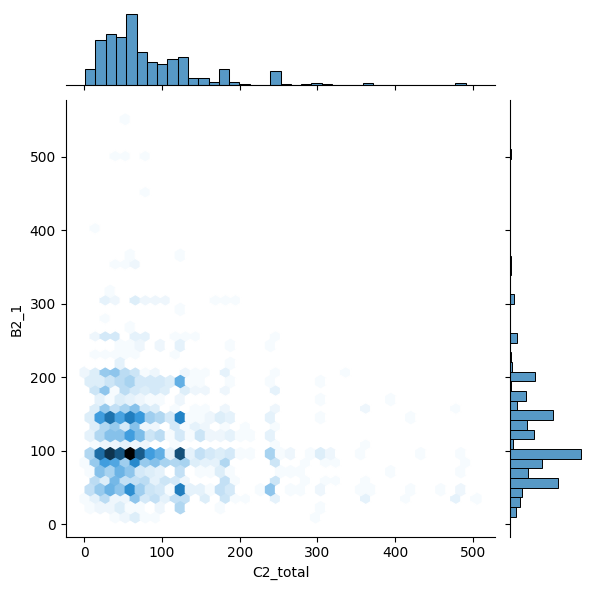

In [39]:
sns.jointplot(x='C2_total', y='B2_1', data=single_df, kind='hex')

```
개월수가 적을수록 한 달 최소 생활비가 적다는 것은 개인이 혼자 사는 기간이 짧을수록 월별 생활비가 줄어든다는 것을 의미합니다. 이는 짧은 기간 동안에는 생활비를 절약하는 것이 가능하기 때문입니다. 따라서 일시적으로 혼자 사는 경우에는 월별 생활비가 줄어들 수 있습니다.
```

# 결론
- 1인가구가 많은 지역에서 전세나 월세 비율이 더 높을 것으로 예상되지만, 실제로는 전체 가구와 1인 가구 모두 자가 거주의 비율이 높은 경향을 보입니다. 이는 독거 노인이나 혼자 사는 젊은 성인들이 자가 주택을 선호하거나 보유하고 있는 경우가 많아서 그럴 수 있습니다.

- 전체 가구의 경우, 생활비를 마련하는 데에는 주로 금융 상품을 활용하는 경향이 있습니다. 또한, 금융 상품의 인출이나 해지, 그리고 가족이나 친척의 도움을 받는 비율도 높게 나타납니다.

- 반면, 1인 가구의 경우 가장 높은 비율을 차지하는 것은 가족이나 친척의 도움입니다. 이어서 금융 상품의 이용이 두 번째로 많이 나타납니다.

- 1인 가구 중에서 직장 때문에 혼자 사는 경우에는 가계 부채를 갖는 비율이 높습니다. 이것은 혼자 사는 사람들이 주로 생활비를 마련하기 위해 대출을 이용하기 때문입니다. 전체적으로 봤을 때, 1인 가구는 가계 부채를 갖는 비율이 높은 편입니다. 그러나 학업 때문에 혼자 사는 경우에는 가계 부채가 없는 비율이 조금 더 높아지는 경향이 있습니다. 이는 학업에 집중하여 추가적인 경제적 부담을 피하기 위해 가계 부채를 갖지 않는 경우가 많기 때문입니다.

- 개월수가 적을수록 한 달 최소 생활비가 적다는 것은 개인이 혼자 사는 기간이 짧을수록 월별 생활비가 줄어든다는 것을 의미합니다. 이는 짧은 기간 동안에는 생활비를 절약하는 것이 가능하기 때문입니다. 따라서 일시적으로 혼자 사는 경우에는 월별 생활비가 줄어들 수 있습니다.

- 전체 가구와 1인 가구 모두 자가 거주 비율이 높은 것으로 나타났습니다. 이는 주거형태에 대한 선호도가 자가 주택으로 기울어져 있음을 시사합니다. 보통은 1인 가구가 전세나 월세 형태로 생각되지만, 실제로는 자가 거주 비율이 높은 이유에는 독거 노인이나 혼자 사는 젊은 성인들이 자가 주택을 선호하거나 보유하는 경우가 많기 때문일 것입니다.

- 또한, 전체 가구의 경우 주로 금융 상품을 활용하여 생활비를 마련하고 있으며, 가족이나 친척의 도움도 많이 받고 있습니다. 반면, 1인 가구는 주로 가족이나 친척의 도움을 받는 비율이 높은 편입니다.

- 직장 때문에 혼자 사는 경우에는 가계 부채를 갖는 비율이 높습니다. 이는 혼자 사는 사람들이 생활비를 마련하기 위해 대출을 이용하는 경향이 있기 때문입니다. 학업 때문에 혼자 사는 경우에는 가계 부채가 없는 비율이 조금 더 높은데, 이는 학업에 집중하여 경제적 부담을 피하기 위해 가계 부채를 갖지 않는 경우가 많기 때문입니다.

- 마지막으로, 개월수가 적을수록 한 달 최소 생활비가 적다는 것은 혼자 사는 기간이 짧을수록 월별 생활비가 줄어든다는 것을 의미합니다. 짧은 기간 동안에는 생활비를 절약하는 것이 가능하기 때문에 일시적으로 혼자 사는 경우에는 월별 생활비가 줄어들 수 있습니다.